In [45]:
#!/usr/bin/python

# Import required modules
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mpltkr
import matplotlib.colors as mplcolors
import matplotlib.patches as mplpatches
import matplotlib.lines as mpllines
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import cdist, directed_hausdorff

# Import COSMO style toolkit
import cosmoplot.colorbars as cosmocbars
import cosmoplot.utils as cosmoutils
import cosmoplot.style as cosmostyle

cosmostyle.set_style('article')
colorList = cosmostyle.color_cycle

In [75]:
IZA_KPCA_3 = np.load('../Processed_Data/IZA_OPTonDEEM_1k/PCA/3.5/kpca_proj.npy')
IZA_KPCA_6 = np.load('../Processed_Data/IZA_OPTonDEEM_1k/PCA/6.0/kpca_proj.npy')
DEEM_KPCA_3 = np.load('../Processed_Data/DEEM_1k/PCA/3.5/kpca-0.npy')
DEEM_KPCA_6 = np.load('../Processed_Data/DEEM_1k/PCA/6.0/kpca-0.npy')

IZA_PCA_3 = np.load('../Processed_Data/IZA_OPTonDEEM_1k/PCA/3.5/pca-0.npy')
IZA_PCA_6 = np.load('../Processed_Data/IZA_OPTonDEEM_1k/PCA/6.0/pca-0.npy')
DEEM_PCA_3 = np.load('../Processed_Data/DEEM_1k/PCA/3.5/pca-0.npy')
DEEM_PCA_6 = np.load('../Processed_Data/DEEM_1k/PCA/6.0/pca-0.npy')

In [76]:
IZA_atoms = np.loadtxt('../Processed_Data/IZA_OPT/atoms.dat', usecols=(7, 8, 9))
DEEM_atoms = np.loadtxt('../Processed_Data/DEEM_1k/atoms.dat', usecols=(7, 8, 9))

In [77]:
IZA_u, IZA_idxs = np.unique(IZA_atoms[:, 0], return_index=True)
DEEM_u, DEEM_idxs = np.unique(DEEM_atoms[:, 0], return_index=True)

In [78]:
IZA_n_atoms = np.zeros(IZA_idxs.size, dtype=np.int)
DEEM_n_atoms = np.zeros(DEEM_idxs.size, dtype=np.int)

IZA_n_atoms[0:-1] = np.diff(IZA_idxs)
IZA_n_atoms[-1] = IZA_atoms.shape[0] - IZA_idxs[-1]

DEEM_n_atoms[0:-1] = np.diff(DEEM_idxs)
DEEM_n_atoms[-1] = DEEM_atoms.shape[0] - DEEM_idxs[-1]

# 3.5 A

In [100]:
# Hausdorff distance
n_dim = 3
hausdorff_KPCA_ID = directed_hausdorff(IZA_KPCA_3[:, 0:n_dim], DEEM_KPCA_3[:, 0:n_dim])
hausdorff_KPCA_DI = directed_hausdorff(DEEM_KPCA_3[:, 0:n_dim], IZA_KPCA_3[:, 0:n_dim])

print(hausdorff_KPCA_ID, hausdorff_KPCA_DI)

hausdorff_PCA_ID = directed_hausdorff(IZA_PCA_3[:, 0:n_dim], DEEM_PCA_3[:, 0:n_dim])
hausdorff_PCA_DI = directed_hausdorff(DEEM_PCA_3[:, 0:n_dim], IZA_PCA_3[:, 0:n_dim])

print(hausdorff_PCA_ID, hausdorff_PCA_DI)

(0.02441362980212139, 505, 42039) (0.7091522841120266, 2299, 778)
(0.010384224672905338, 1151, 1870) (0.4135343403913971, 1657, 782)


In [101]:
m_IZA = 0
m_DEEM = 0
hausdorff_mat_KPCA_3 = np.zeros((IZA_n_atoms.size, DEEM_n_atoms.size))
hausdorff_mat_idx_DEEM = np.zeros((IZA_n_atoms.size, DEEM_n_atoms.size))
hausdorff_mat_idx_IZA = np.zeros((IZA_n_atoms.size, DEEM_n_atoms.size))

for idx, i in enumerate(IZA_n_atoms):
    s_IZA = IZA_KPCA_3[m_IZA:m_IZA+i, 0:n_dim]
    m_IZA += i
    for jdx, j in enumerate(DEEM_n_atoms):
        s_DEEM = DEEM_KPCA_3[m_DEEM:m_DEEM+j, 0:n_dim]
        d, idx_DEEM, idx_IZA = directed_hausdorff(s_DEEM, s_IZA)
        hausdorff_mat_KPCA_3[idx, jdx] = d
                                         #max(directed_hausdorff(s_IZA, s_DEEM)[0],
                                         #   directed_hausdorff(s_DEEM, s_IZA)[0])
        hausdorff_mat_idx_DEEM[idx, jdx] = idx_DEEM
        hausdorff_mat_idx_IZA[idx, jdx] = idx_IZA
        m_DEEM += j
        
    m_DEEM = 0
    

In [102]:
print(hausdorff_mat_KPCA_3.shape)

(35, 1000)


In [103]:
# Closest DEEM counterpart for each IZA
struct_min = np.argmin(hausdorff_mat_KPCA_3, axis=1)
print(struct_min)

[157 157 674 573 157 157 232 157 306 177 790 573 157 217 306 988 293 674
 335 348 335 157 335 550 157 157 157 177 573 229 157 157 306 199 573]


In [104]:
# Mean/Min/Max distance from (a) DEEM to (all) IZA
hdist_mean = np.mean(hausdorff_mat_KPCA_3, axis=0)
hdist_min = np.amin(hausdorff_mat_KPCA_3, axis=0)
hdist_max = np.amax(hausdorff_mat_KPCA_3, axis=0)

# Ordered by increasing metric
# Gives the DEEM closest to an IZA by Hausdorff metric
sort_idxs_mean = np.argsort(hdist_mean)
sort_idxs_min = np.argsort(hdist_min)
sort_idxs_max = np.argsort(hdist_max)

In [105]:
# Give each environment in a structure the color of that structure
# according to the Hausdorff distance
hdist_mean_colors_3 = np.zeros(DEEM_KPCA_3.shape[0])
hdist_min_colors_3 = np.zeros(DEEM_KPCA_3.shape[0])
hdist_max_colors_3 = np.zeros(DEEM_KPCA_3.shape[0])

m = 0
for hdx, h in enumerate(hdist_mean):
    hdist_mean_colors_3[m:m+DEEM_n_atoms[hdx]] = h
    m += DEEM_n_atoms[hdx]
  
m = 0
for hdx, h in enumerate(hdist_min):
    hdist_min_colors_3[m:m+DEEM_n_atoms[hdx]] = h
    m += DEEM_n_atoms[hdx]
    
m = 0
for hdx, h in enumerate(hdist_max):
    hdist_max_colors_3[m:m+DEEM_n_atoms[hdx]] = h
    m += DEEM_n_atoms[hdx]

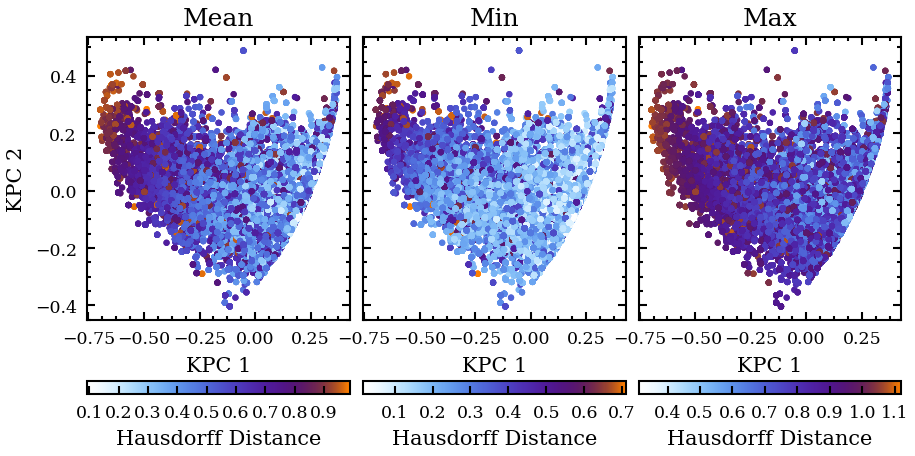

In [106]:
fig = plt.figure(figsize=(7.0, 3.5))
axs_mean = fig.add_subplot(1, 3, 1)
axs_min = fig.add_subplot(1, 3, 2)
axs_max = fig.add_subplot(1, 3, 3)

s_mean = axs_mean.scatter(DEEM_KPCA_3[:, 0], DEEM_KPCA_3[:, 1], c=hdist_mean_colors_3, cmap='cbarHot')
axs_mean.set_title('Mean')
axs_mean.set_xlabel('KPC 1')
axs_mean.set_ylabel('KPC 2')
cb_mean = fig.colorbar(s_mean, ax=axs_mean, orientation='horizontal', label='Hausdorff Distance')
cb_mean.ax.minorticks_off()

s_min = axs_min.scatter(DEEM_KPCA_3[:, 0], DEEM_KPCA_3[:, 1], c=hdist_min_colors_3, cmap='cbarHot')
axs_min.set_title('Min')
axs_min.set_xlabel('KPC 1')
axs_min.set_yticklabels([])
cb_min = fig.colorbar(s_min, ax=axs_min, orientation='horizontal', label='Hausdorff Distance')
cb_min.ax.minorticks_off()

s_max = axs_max.scatter(DEEM_KPCA_3[:, 0], DEEM_KPCA_3[:, 1], c=hdist_max_colors_3, cmap='cbarHot')
axs_max.set_title('Max')
axs_max.set_xlabel('KPC 1')
axs_max.set_yticklabels([])
cb_max = fig.colorbar(s_max, ax=axs_max, orientation='horizontal', label='Hausdorff Distance')
cb_max.ax.minorticks_off()

fig.subplots_adjust(wspace=0.05)

#fig.savefig('../Results/DEEM_1k/kpca-12_3.5_hausdorff.png')
plt.show()

# 6.0 A

In [121]:
# Hausdorff distance
n_dim = 3
hausdorff_KPCA_ID = directed_hausdorff(IZA_KPCA_6[:, 0:n_dim], DEEM_KPCA_6[:, 0:n_dim])
hausdorff_KPCA_DI = directed_hausdorff(DEEM_KPCA_6[:, 0:n_dim], IZA_KPCA_6[:, 0:n_dim])

print(hausdorff_KPCA_ID, hausdorff_KPCA_DI)

hausdorff_PCA_ID = directed_hausdorff(IZA_PCA_6[:, 0:n_dim], DEEM_PCA_6[:, 0:n_dim])
hausdorff_PCA_DI = directed_hausdorff(DEEM_PCA_6[:, 0:n_dim], IZA_PCA_6[:, 0:n_dim])

print(hausdorff_PCA_ID, hausdorff_PCA_DI)

(0.10419835994165479, 1597, 5019) (0.2879870845856626, 15029, 1210)
(0.14437019253313552, 1606, 38001) (0.32355944279065946, 15027, 1210)


In [122]:
m_IZA = 0
m_DEEM = 0
hausdorff_mat_KPCA_6 = np.zeros((IZA_n_atoms.size, DEEM_n_atoms.size))
hausdorff_mat_idx_DEEM = np.zeros((IZA_n_atoms.size, DEEM_n_atoms.size))
hausdorff_mat_idx_IZA = np.zeros((IZA_n_atoms.size, DEEM_n_atoms.size))

for idx, i in enumerate(IZA_n_atoms):
    s_IZA = IZA_KPCA_6[m_IZA:m_IZA+i, 0:n_dim]
    m_IZA += i
    for jdx, j in enumerate(DEEM_n_atoms):
        s_DEEM = DEEM_KPCA_6[m_DEEM:m_DEEM+j, 0:n_dim]
        d, idx_DEEM, idx_IZA = directed_hausdorff(s_DEEM, s_IZA)
        hausdorff_mat_KPCA_6[idx, jdx] = d
                                         #max(directed_hausdorff(s_IZA, s_DEEM)[0],
                                         #   directed_hausdorff(s_DEEM, s_IZA)[0])
        hausdorff_mat_idx_DEEM[idx, jdx] = idx_DEEM
        hausdorff_mat_idx_IZA[idx, jdx] = idx_IZA
        m_DEEM += j
        
    m_DEEM = 0
    

In [123]:
# Closest DEEM counterpart for each IZA
struct_min = np.argmin(hausdorff_mat_KPCA_6, axis=1)
print(struct_min)

[694 504 794  65  65 165 157 694 157 951 833 748 576 425 950  65 914 933
 217 495 960  65 353 694 694 960 117 914 913 425 914 694 146 933 286]


In [124]:
# Mean/Min/Max distance from (a) DEEM to (all) IZA
hdist_mean = np.mean(hausdorff_mat_KPCA_6, axis=0)
hdist_min = np.amin(hausdorff_mat_KPCA_6, axis=0)
hdist_max = np.amax(hausdorff_mat_KPCA_6, axis=0)

# Ordered by increasing metric
sort_idxs_mean = np.argsort(hdist_mean)
sort_idxs_min = np.argsort(hdist_min)
sort_idxs_max = np.argsort(hdist_max)

In [125]:
# Give each environment in a structure the color of that structure
# according to the Hausdorff distance
hdist_mean_colors_6 = np.zeros(DEEM_KPCA_6.shape[0])
hdist_min_colors_6 = np.zeros(DEEM_KPCA_6.shape[0])
hdist_max_colors_6 = np.zeros(DEEM_KPCA_6.shape[0])

m = 0
for hdx, h in enumerate(hdist_mean):
    hdist_mean_colors_6[m:m+DEEM_n_atoms[hdx]] = h
    m += DEEM_n_atoms[hdx]
  
m = 0
for hdx, h in enumerate(hdist_min):
    hdist_min_colors_6[m:m+DEEM_n_atoms[hdx]] = h
    m += DEEM_n_atoms[hdx]
    
m = 0
for hdx, h in enumerate(hdist_max):
    hdist_max_colors_6[m:m+DEEM_n_atoms[hdx]] = h
    m += DEEM_n_atoms[hdx]

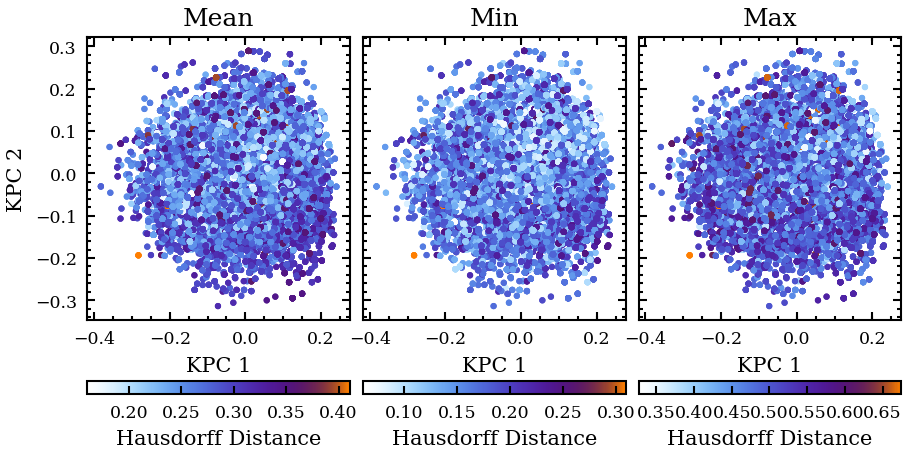

In [126]:
fig = plt.figure(figsize=(7.0, 3.5))
axs_mean = fig.add_subplot(1, 3, 1)
axs_min = fig.add_subplot(1, 3, 2)
axs_max = fig.add_subplot(1, 3, 3)

s_mean = axs_mean.scatter(DEEM_KPCA_6[:, 0], DEEM_KPCA_6[:, 1], c=hdist_mean_colors_6, cmap='cbarHot')
axs_mean.set_title('Mean')
axs_mean.set_xlabel('KPC 1')
axs_mean.set_ylabel('KPC 2')
cb_mean = fig.colorbar(s_mean, ax=axs_mean, orientation='horizontal', label='Hausdorff Distance')
cb_mean.ax.minorticks_off()

s_min = axs_min.scatter(DEEM_KPCA_6[:, 0], DEEM_KPCA_6[:, 1], c=hdist_min_colors_6, cmap='cbarHot')
axs_min.set_title('Min')
axs_min.set_xlabel('KPC 1')
axs_min.set_yticklabels([])
cb_min = fig.colorbar(s_min, ax=axs_min, orientation='horizontal', label='Hausdorff Distance')
cb_min.ax.minorticks_off()

s_max = axs_max.scatter(DEEM_KPCA_6[:, 0], DEEM_KPCA_6[:, 1], c=hdist_max_colors_6, cmap='cbarHot')
axs_max.set_title('Max')
axs_max.set_xlabel('KPC 1')
axs_max.set_yticklabels([])
cb_max = fig.colorbar(s_max, ax=axs_max, orientation='horizontal', label='Hausdorff Distance')
cb_max.ax.minorticks_off()

fig.subplots_adjust(wspace=0.05)

#fig.savefig('../Results/DEEM_1k/kpca-12_6.0_hausdorff.png')
plt.show()

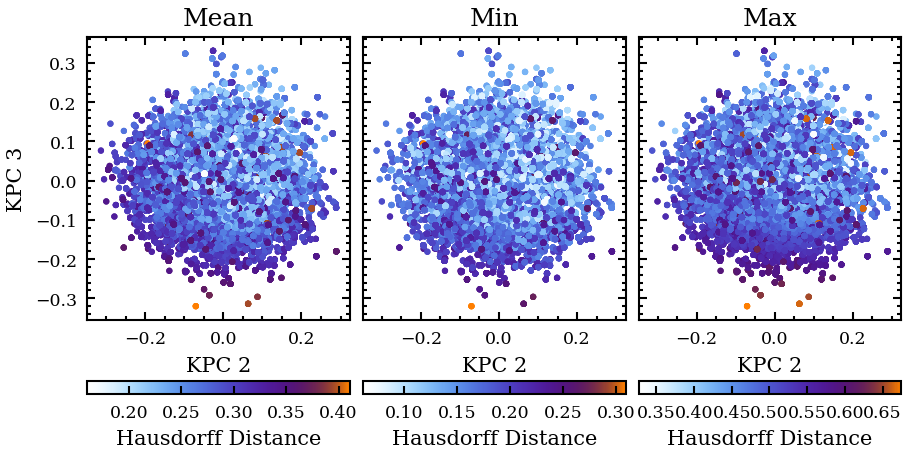

In [127]:
fig = plt.figure(figsize=(7.0, 3.5))
axs_mean = fig.add_subplot(1, 3, 1)
axs_min = fig.add_subplot(1, 3, 2)
axs_max = fig.add_subplot(1, 3, 3)

s_mean = axs_mean.scatter(DEEM_KPCA_6[:, 1], DEEM_KPCA_6[:, 2], c=hdist_mean_colors_6, cmap='cbarHot')
axs_mean.set_title('Mean')
axs_mean.set_xlabel('KPC 2')
axs_mean.set_ylabel('KPC 3')
cb_mean = fig.colorbar(s_mean, ax=axs_mean, orientation='horizontal', label='Hausdorff Distance')
cb_mean.ax.minorticks_off()

s_min = axs_min.scatter(DEEM_KPCA_6[:, 1], DEEM_KPCA_6[:, 2], c=hdist_min_colors_6, cmap='cbarHot')
axs_min.set_title('Min')
axs_min.set_xlabel('KPC 2')
axs_min.set_yticklabels([])
cb_min = fig.colorbar(s_min, ax=axs_min, orientation='horizontal', label='Hausdorff Distance')
cb_min.ax.minorticks_off()

s_max = axs_max.scatter(DEEM_KPCA_6[:, 1], DEEM_KPCA_6[:, 2], c=hdist_max_colors_6, cmap='cbarHot')
axs_max.set_title('Max')
axs_max.set_xlabel('KPC 2')
axs_max.set_yticklabels([])
cb_max = fig.colorbar(s_max, ax=axs_max, orientation='horizontal', label='Hausdorff Distance')
cb_max.ax.minorticks_off()

fig.subplots_adjust(wspace=0.05)

#fig.savefig('../Results/DEEM_1k/kpca-23_6.0_hausdorff.png')
plt.show()